<a href="https://colab.research.google.com/github/f-amerehi/bug-free-pytorch-and-Tensorflow/blob/main/ImageVariations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/huggingface/diffusers.git transformers accelerate

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-ov_hy2np
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-ov_hy2np
  Resolved https://github.com/huggingface/diffusers.git to commit a1cb106459da4c595d22c04e026d7169d8dcfd2b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1984357 sha256=b797ba6f74cf63b28629a7f1e8c2bf02f34b50916685710353e02742e28f1849
  Stored in directory: /tmp/pip-ephem-wheel-cache-z33b6pai/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


In [2]:
import requests
import torch
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from diffusers import StableUnCLIPImg2ImgPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

(…)_noising_scheduler/scheduler_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/470 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

image_normalizer/config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/8.36k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.48G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


In [9]:
url = "https://bd.gaadicdn.com/processedimages/yamaha/mt-15-2-0/640X309/mt-15-2-063ea25b00fa58.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")

images = pipe(init_image).images

print("Number of images generated:", len(images))

  0%|          | 0/21 [00:00<?, ?it/s]

Number of images generated: 1


  0%|          | 0/21 [00:00<?, ?it/s]

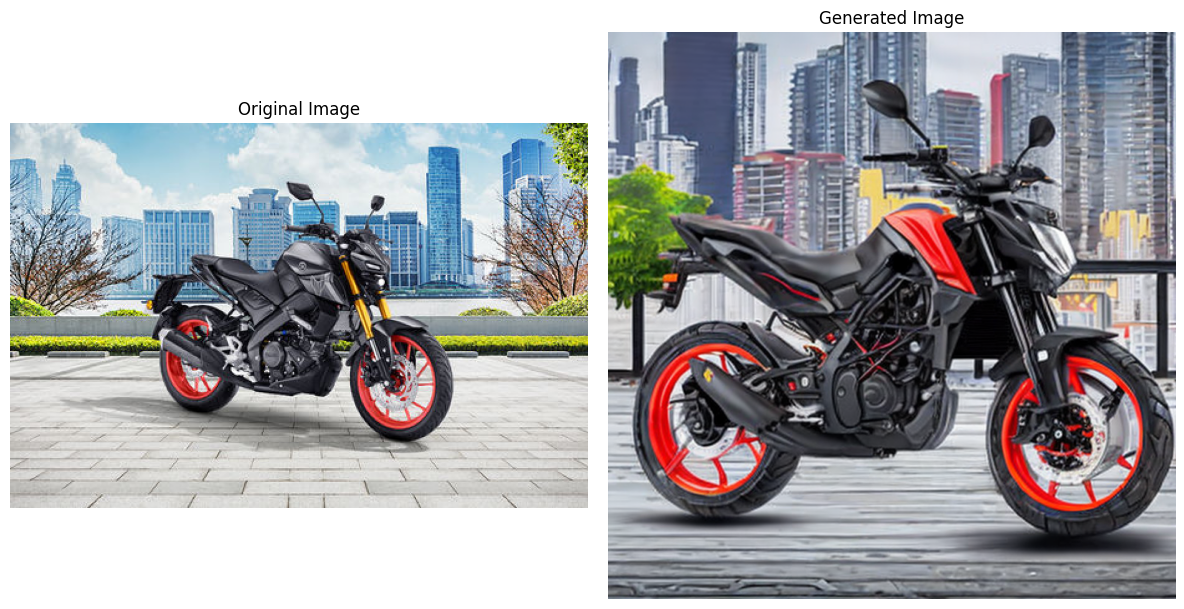

In [10]:
generated_images = pipe(init_image).images

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(generated_images[0])
axes[1].set_title('Generated Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [15]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg/1200px-LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg'
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")

images = pipe(init_image).images


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

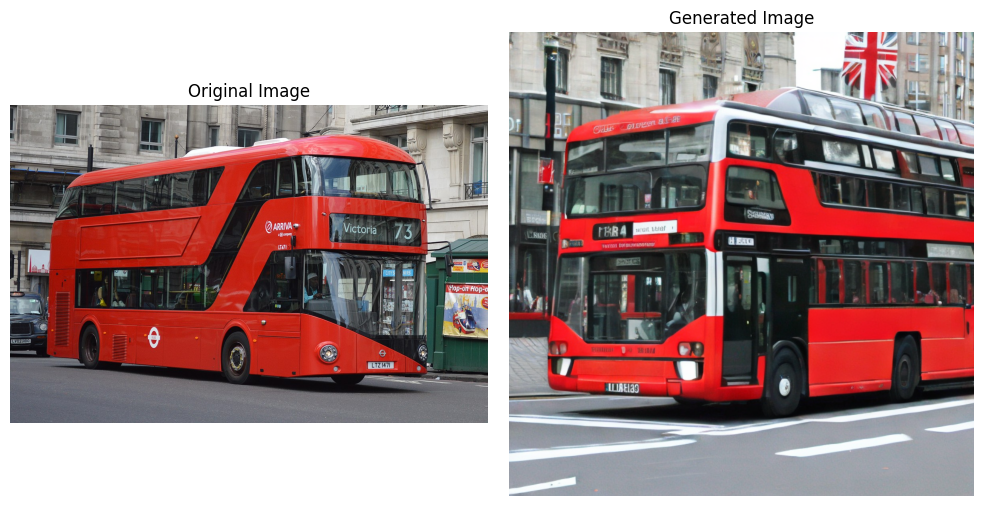

In [16]:
generated_images = pipe(init_image).images

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(generated_images[0])
axes[1].set_title('Generated Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()